In [33]:
import numpy 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
import seaborn as sns

In [34]:
import pandas
import pandas as pd

In [35]:
df = pd.read_csv("C:/Users/sayal/Desktop/PROJECTS/MAJOR PROJECT/ccpp.csv")
df['Ambient_Temp'] = pd.to_numeric(df['Ambient_Temp'],errors = 'coerce')
df['Ambient_Pressure'] = pd.to_numeric(df['Ambient_Pressure'], errors = 'coerce')
df['Relative_Humidity'] = pd.to_numeric(df['Relative_Humidity'],errors = 'coerce')
df['Exhaust_Vacuum'] = pd.to_numeric(df['Exhaust_Vacuum'],errors = 'coerce')
df['Energy_Output'] = pd.to_numeric(df['Energy_Output'],errors = 'coerce')
print("Setup Complete")

Setup Complete


In [36]:
df.info()
#All the independent variables are numerical data type and it doesnt have any null values.
#The dependent variable is PE - Electrical energy ouput is also an numeric type without null values.
#Since, the value is numerical and contineous. So, Linear regression model is used to predict the value of the power.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ambient_Temp       9568 non-null   float64
 1   Exhaust_Vacuum     9568 non-null   float64
 2   Ambient_Pressure   9568 non-null   float64
 3   Relative_Humidity  9568 non-null   float64
 4   Energy_Output      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [37]:
y=df.Energy_Output
features=['Ambient_Temp','Ambient_Pressure','Relative_Humidity']
x=df[features]
#print(X.describe())
print(x.head())
df.shape

   Ambient_Temp  Ambient_Pressure  Relative_Humidity
0          8.34           1010.84              90.01
1         23.64           1011.40              74.20
2         29.74           1007.15              41.91
3         19.07           1007.22              76.79
4         11.80           1017.13              97.20


(9568, 5)

In [38]:
del df["Exhaust_Vacuum"]

In [39]:
dups = df.duplicated()
print(dups.any())
print(df[dups])

True
      Ambient_Temp  Ambient_Pressure  Relative_Humidity  Energy_Output
1696          7.24           1020.35              80.56         486.76
1979         29.45           1018.12              50.68         437.31
2378         12.27           1019.39              52.18         473.84
3696         24.79           1017.07              68.23         440.05
5020         12.00           1019.48              58.71         474.40
5150         12.27           1019.41              58.10         475.13
5548          6.86           1020.12              79.14         490.23
5578          7.64           1020.01              75.14         488.53
6129         29.51           1017.92              50.61         431.18
6251          8.07           1019.40              86.43         484.54
6278          9.54           1019.79              65.61         481.18
6327         25.21           1017.19              69.84         445.84
6495         26.12           1017.41              72.31         439.68
6

In [40]:
df.drop_duplicates(inplace=True)
df.head()

,Ambient_Temp,Ambient_Pressure,Relative_Humidity,Energy_Output
0,8.34,1010.84,90.01,480.48
1,23.64,1011.40,74.20,445.75
2,29.74,1007.15,41.91,438.76
3,19.07,1007.22,76.79,453.09
4,11.80,1017.13,97.20,464.43


In [42]:
df.describe()

,Ambient_Temp,Ambient_Pressure,Relative_Humidity,Energy_Output
count,9527.000000,9527.000000,9527.000000,9527.00000
mean,19.658225,1013.237084,73.334951,454.33591
std,7.444397,5.940526,14.607513,17.03908
min,1.810000,992.890000,25.560000,420.26000
25%,13.530000,1009.085000,63.375000,439.75000
50%,20.350000,1012.920000,75.000000,451.52000
75%,25.710000,1017.200000,84.850000,468.36500
max,37.110000,1033.300000,100.160000,495.76000


In [43]:
df.isnull().sum()

Ambient_Temp         0
Ambient_Pressure     0
Relative_Humidity    0
Energy_Output        0
dtype: int64

<AxesSubplot:>

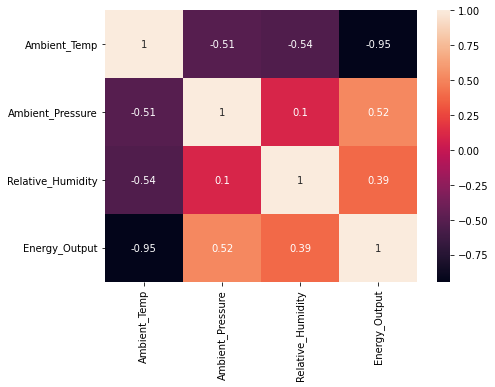

In [44]:
import seaborn as sns
plt.figure(figsize = (7, 5))
sns.heatmap(df.corr(), annot = True)

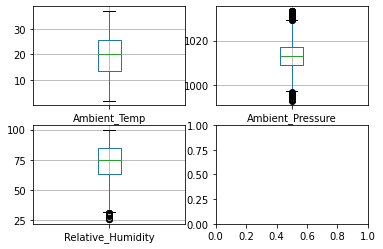

In [45]:
fig, axes = plt.subplots(2,2)
for i,el in enumerate(list(df.columns.values)[:-1]):
    a = df.boxplot(el, ax=axes.flatten()[i])

In [46]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 3)
(1914, 3)
(7654,)
(1914,)


In [47]:
lm=linear_model.LinearRegression()
model=lm.fit(x_train,y_train)
pred=lm.predict(x_train)
print(pred)

[427.0699729  472.62898075 473.86790079 ... 432.51341354 478.8223461
 473.5806919 ]


In [48]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-2.37459634  0.02871513 -0.2044883 ]
Intercept: 486.93295786868464


In [57]:
#checking accuracy:
from sklearn.metrics import r2_score
predd = lm.predict(x_test)
print("R-Squared: ",r2_score(y_test, predd))

R-Squared:  0.9231046470753261


In [55]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, predd, squared=False)
print("RMSE:", rmse)

RMSE: 4.80842478078142


Text(0.5, 1.0, 'Observed vs. Predicted Energy Output')

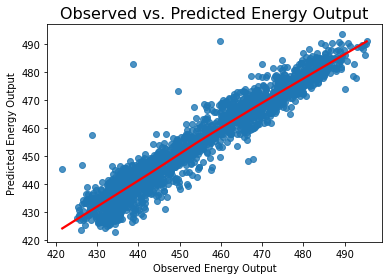

In [62]:
sns.regplot(x=y_test, y=predd, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Observed Energy Output')
plt.ylabel('Predicted Energy Output')
plt.title('Observed vs. Predicted Energy Output', fontsize=16)